In [0]:
# activate R magic
%load_ext rpy2.ipython

In [0]:
from google.colab import files
from IPython.display import Image

---

#**Modelo Preditivo de Classificação**  - Aprendizagem Supervisionada 

Gerar através do Modelo Preditivo uma **classe binária** de saída para **concessão de crédito** para novos clientes. 

Este modelo foi alimentado por histórico de clientes que receberam ou não crédito. 

Comparação entre classificação **Correta** e classificação **Incorreta**. Erros são mediddos pelas taxas classificações incorretas. 

---

## Performance dos Modelos de Classificação - **Confusion Matrix**

Suporte de cáculos às **Medidas de Performance**


In [0]:
uploaded = files.upload()

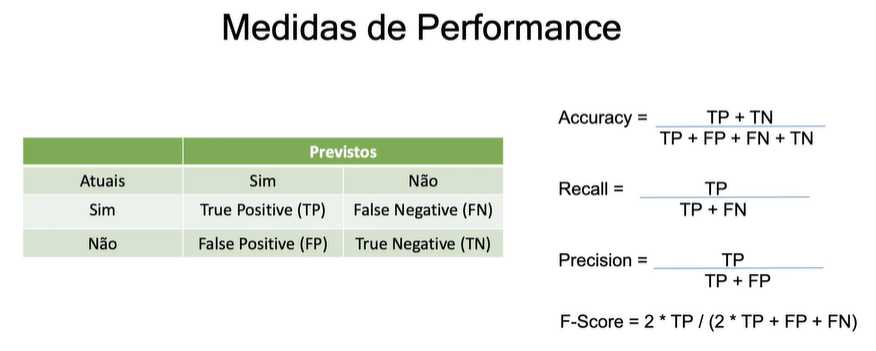

In [11]:
Image("conf.PNG")

---

##**Sumário:**

Este  experimento  tem  como  objetivo  criar  um  modelo  preditivo  para classificar o risco de crédito de clientes de uma instituição bancária

##**Descrição:**

Este experimento visa demonstrar o processo de construção de um modelo de classificaçãopara  prever o  risco  de  concessão  de  crédito  a  clientes  de  um banco. Usaremos um conjunto de dados para construir e treinar nosso modelo.

##**Dados:**

O  conjunto  de  dados  “German  Credit  Data”  será  usado  para  construir  e treinar  o  modelo,  neste  experimento.  Este  dataset  é  baseado  em  dados  reais gerados por um pesquisador da Universidade de Hamburgo, na Alemanha.

O  dataset  contém 1000 observações  e 20 variáveis,  representando  os dados  de  clientes,  tais  como:  

**status  da  conta  corrente,  histórico  de  crédito, quantidade de crédito atual, empregabilidade, residência, idade, etc...**

**Dicionário de Dados**: https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data)

##**Objetivo:**

O objetivo será prever o risco que cada cliente oferece para o banco, na hora de conceder uma linha de crédito. O modelo preditivo deve ser bastante preciso, pois conceder crédito aum cliente com péssimo potencial de pagamento, pode trazer um grande prejuízo para o banco.

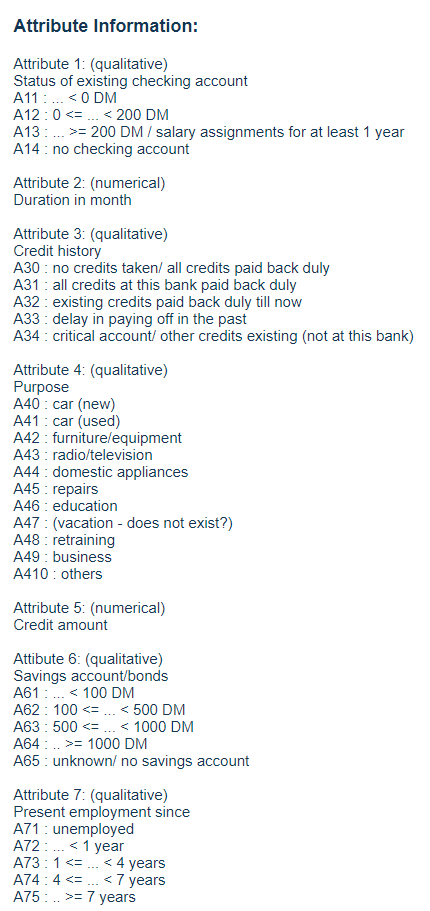

In [13]:
Image("at1.PNG")

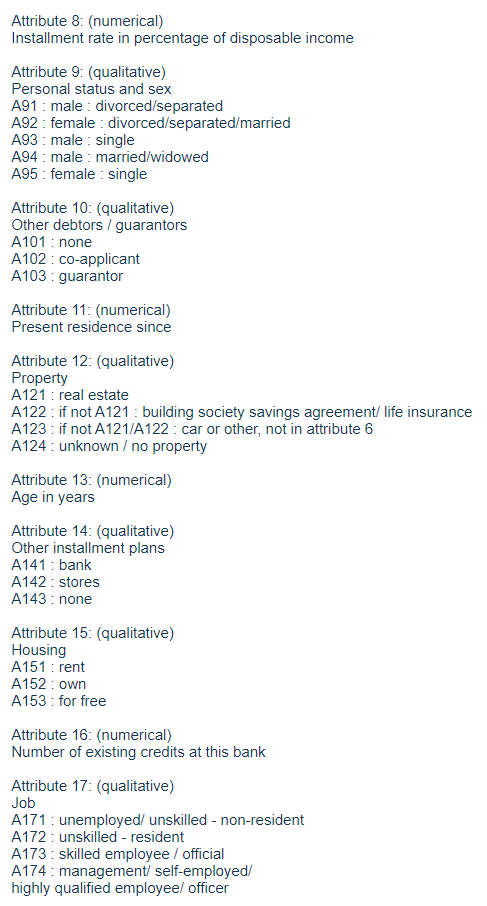

In [14]:
Image("at2.PNG")

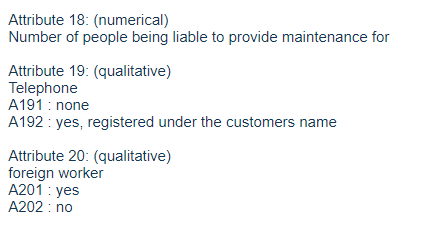

In [15]:
Image("at3.PNG")

---

# **Concessão de Crédito**

In [0]:
%%R
# Carrega o dataset antes da transformacao
df <- read.csv("credito.csv")
str(df)

'data.frame':	999 obs. of  21 variables:
 $ A11  : Factor w/ 4 levels "A11","A12","A13",..: 2 4 1 1 4 4 2 4 2 2 ...
 $ X6   : int  48 12 42 24 36 24 36 12 30 12 ...
 $ A34  : Factor w/ 5 levels "A30","A31","A32",..: 3 5 3 4 3 3 3 3 5 3 ...
 $ A43  : Factor w/ 10 levels "A40","A41","A410",..: 5 8 4 1 8 4 2 5 1 1 ...
 $ X1169: int  5951 2096 7882 4870 9055 2835 6948 3059 5234 1295 ...
 $ A65  : Factor w/ 5 levels "A61","A62","A63",..: 1 1 1 1 5 3 1 4 1 1 ...
 $ A75  : Factor w/ 5 levels "A71","A72","A73",..: 3 4 4 3 3 5 3 4 1 2 ...
 $ X4   : int  2 2 2 3 2 3 2 2 4 3 ...
 $ A93  : Factor w/ 4 levels "A91","A92","A93",..: 2 3 3 3 3 3 3 1 4 2 ...
 $ A101 : Factor w/ 3 levels "A101","A102",..: 1 1 3 1 1 1 1 1 1 1 ...
 $ X4.1 : int  2 3 4 4 4 4 2 4 2 1 ...
 $ A121 : Factor w/ 4 levels "A121","A122",..: 1 1 2 4 4 2 3 1 3 3 ...
 $ X67  : int  22 49 45 53 35 53 35 61 28 25 ...
 $ A143 : Factor w/ 3 levels "A141","A142",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ A152 : Factor w/ 3 levels "A151","A152",..: 2 

In [0]:
# Nome das variáveis
# CheckingAcctStat, Duration, CreditHistory, Purpose, CreditAmount, 
# SavingsBonds, Employment, InstallmentRatePecnt, SexAndStatus, OtherDetorsGuarantors, 
# PresentResidenceTime, Property, Age, OtherInstallments, Housing, ExistingCreditsAtBank,
# Job, NumberDependents, Telephone, ForeignWorker, CreditStatus

#**Engenharia de Atributos** - Categorizando Variáveis Numéricas!

In [0]:
%%R
# Variável que controla a execução do script
Azure <- FALSE

# ---------------------------------------  Execução no Azure Machine Learning
if(Azure){
  source("srClassTools.R")
  Credit <- maml.mapInputPort(1)

# ---------------------------------------  Execução no RStudio
}else{
  source("ClassTools.R")
  Credit <- read.csv("credito.csv", header = F, stringsAsFactors = F )
  metaFrame <- data.frame(colNames, isOrdered, I(factOrder))
  Credit <- fact.set(Credit, metaFrame)
  
# Balancear o número de casos positivos e negativos
  Credit <- equ.Frame(Credit, 2)
}

Convertemos as variáveis qualitativas do tipo string para o tipo categórica e nomeamos as colunas. Isso nos ajudará durante todo o processo de preparação do modelo preditivo.

- "Duration", tinhamos 33 valores únicos. Quantidade relativamente alta para esta dataset. 

- "CreditAmount", 921 valores únicos. Praticamente valores que não se repetem. 

- "Age", 51 valores únicos.

Poderiamos deixar as variáveis da forma que estão, porém variáveis qcom uma grande quantidade de valores únicos podem apresentar problemas durante o treinamento de **Modelos de Classificação**.

Converteremos essas 3 variáveis de numéricas para variáveis qualitativas. **Variáveis categóricas**. Considerando a grande quantidade de valores únicos, vamos reduzí-los **criando categorias com range de valores** para cada uma destas variáveis, em novas variáveis categóricas _f. 

## Criando Novas Variáveis Categóricas

In [0]:
%%R
# Transformando variáveis numéricas em variáveis categóricas  
toFactors <- c("Duration", "CreditAmount", "Age") # Variáveis numéricas existentes
maxVals <- c(100, 1000000, 100) # Vetor com valores Máximos de Categorias por variável

#lapply com a função PASTE passando as variáveis numéricas a fatorar
facNames <- unlist(lapply(toFactors, function(x) paste(x, "_f", sep = "")))

#alternando a variável credit, o conjunto de dados em si. 
Credit[, facNames] <- Map(function(x, y) 

quantize.num(Credit[, x], maxval = y), toFactors, maxVals)

# ------------------------------------------------------------------------

#### ATENÇÃO #### GROUP DATA INTO BINS ####
# ClassToolsR: chamada à biblioteca com funções usadas com frequência
# Função para converter variáveis numéricas para fator
quantize.num <- function(x, 
                         nlevs = 5,     # estabelecendo 5 níveis
                         maxval = 1000, # definindo valor máx de categorias
                         minval = 0,    # definindo valor min de categorias.
                         ordered = TRUE){
# sequência de valor para quantização                             
  cuts <- seq(min(x), max(x), length.out = nlevs + 1) 
  cuts[1] <- minval
  cuts[nlevs + 1] <- maxval
  print(cuts)
# função cut() converte numérico para tipo fator|categorias
  x <- cut(x, breaks = cuts, order_result = ordered)
}

# ?cut

[1]   0.0  17.6  31.2  44.8  58.4 100.0
[1]       0.0    3884.8    7519.6   11154.4   14789.2 1000000.0
[1]   0.0  30.2  41.4  52.6  63.8 100.0


In [0]:
%%R 
str(Credit)

'data.frame':	1300 obs. of  24 variables:
 $ CheckingAcctStat     : Factor w/ 4 levels "A11","A12","A13",..: 1 2 4 1 1 4 4 2 4 2 ...
 $ Duration             : int  6 48 12 42 24 36 24 36 12 30 ...
 $ CreditHistory        : Factor w/ 5 levels "A30","A31","A32",..: 5 3 5 3 4 3 3 3 3 5 ...
 $ Purpose              : Factor w/ 10 levels "A40","A41","A410",..: 5 5 8 4 1 8 4 2 5 1 ...
 $ CreditAmount         : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ SavingsBonds         : Factor w/ 5 levels "A61","A62","A63",..: 5 1 1 1 1 5 3 1 4 1 ...
 $ Employment           : Factor w/ 5 levels "A71","A72","A73",..: 5 3 4 4 3 3 5 3 4 1 ...
 $ InstallmentRatePecnt : int  4 2 2 2 3 2 3 2 2 4 ...
 $ SexAndStatus         : Factor w/ 4 levels "A91","A92","A93",..: 3 2 3 3 3 3 3 3 1 4 ...
 $ OtherDetorsGuarantors: Factor w/ 3 levels "A101","A102",..: 1 1 1 3 1 1 1 1 1 1 ...
 $ PresentResidenceTime : int  4 2 3 4 4 4 4 2 4 2 ...
 $ Property             : Factor w/ 4 levels "A121","A122",..: 1

In [0]:
%%R
# Output 
if(Azure) maml.mapOutputPort('Credit')

---

#**Análise Exploratória**

In [0]:
%%R
# Variável que controla a execução do script
Azure <- FALSE

if(Azure){
  source("ClassTools.R")
  Credit <- maml.mapInputPort(1)
}

R[write to console]: 
Attaching package: ‘ggplot2’


R[write to console]: The following object is masked from ‘package:randomForest’:

    margin




[[1]]

[[2]]
NULL

[[3]]

[[4]]

[[5]]
NULL

[[6]]

[[7]]

[[8]]
NULL

[[9]]

[[10]]

[[11]]
NULL

[[12]]

[[13]]
NULL

[[14]]

[[15]]

[[16]]
NULL

[[17]]

[[18]]
NULL

[[19]]

[[20]]

[[21]]

[[22]]

[[23]]



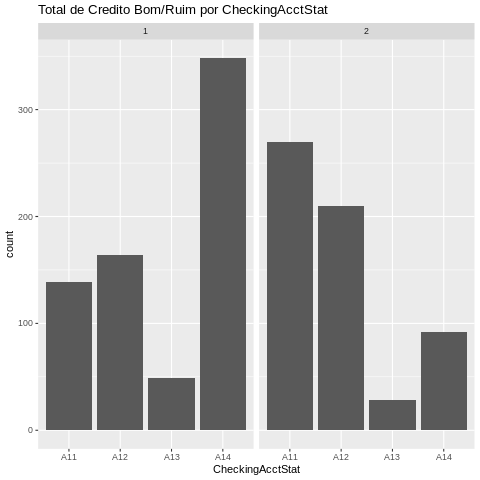

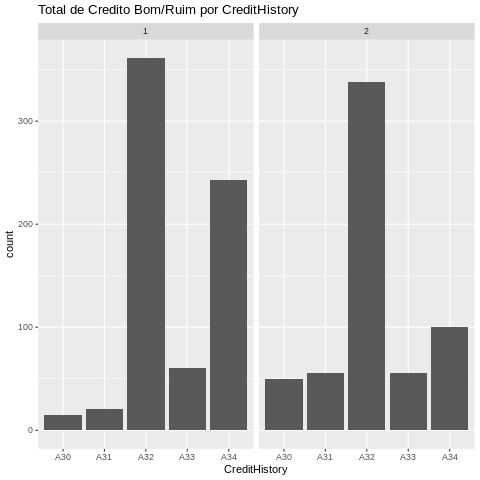

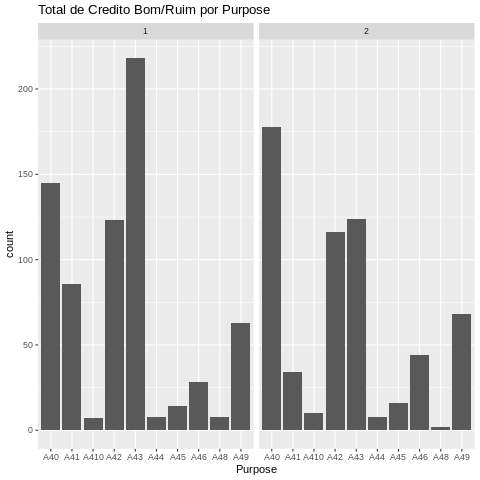

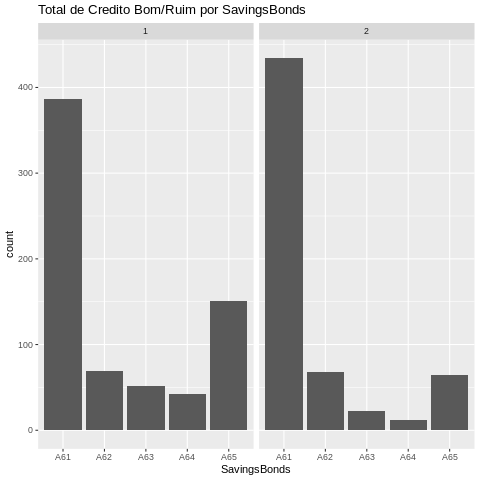

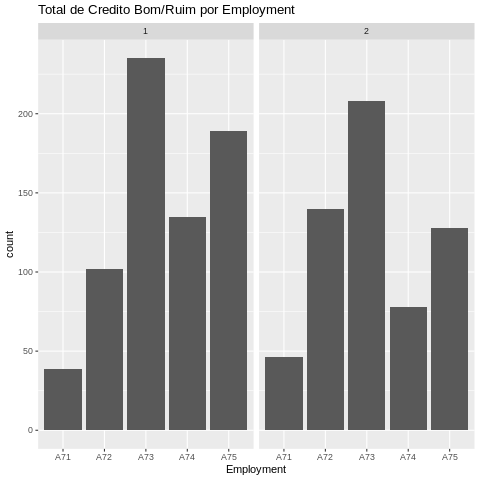

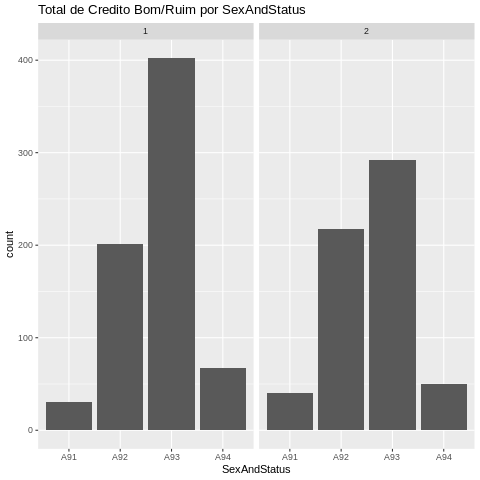

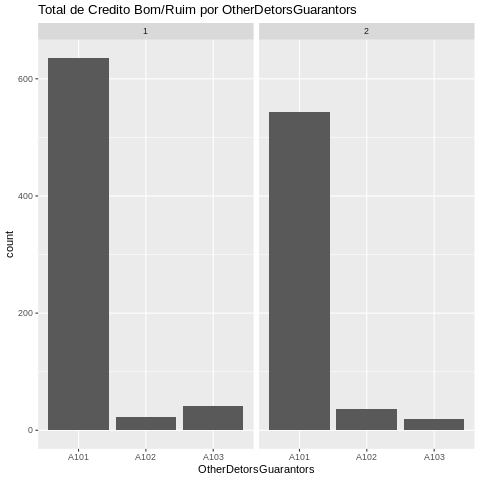

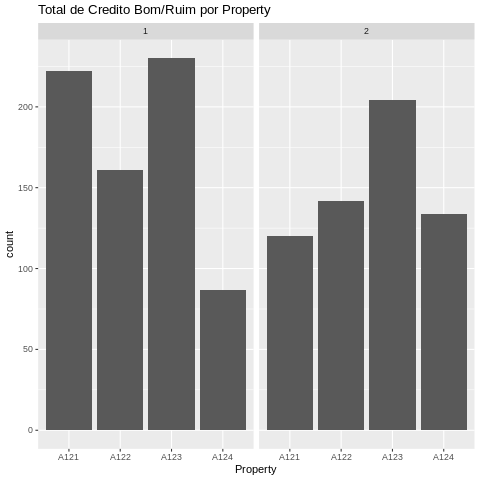

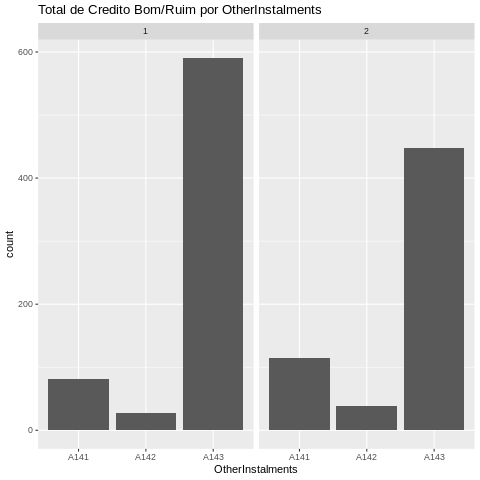

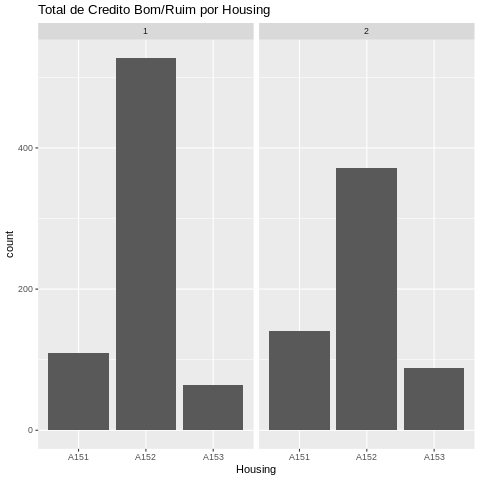

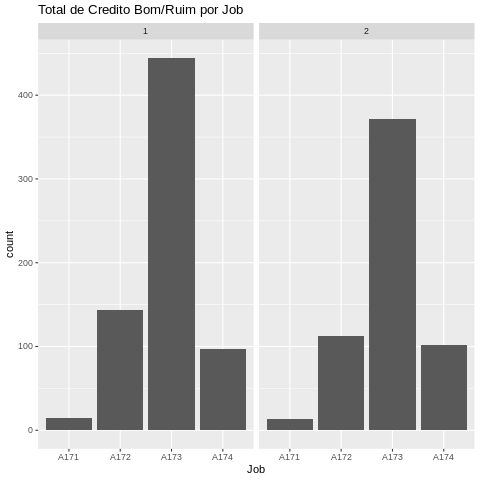

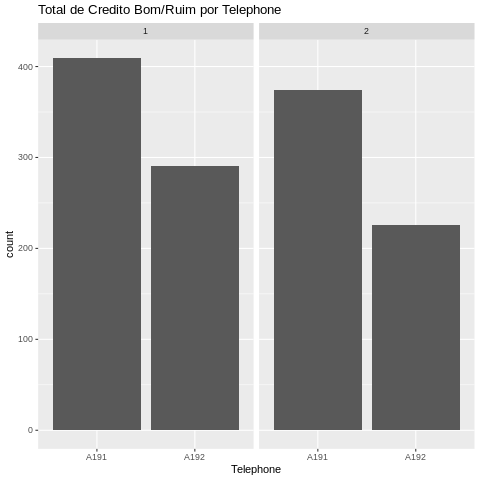

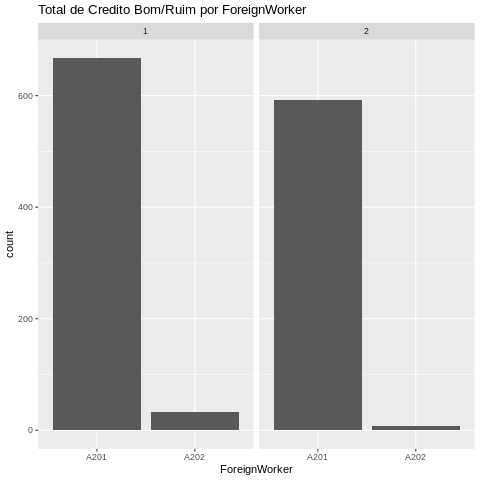

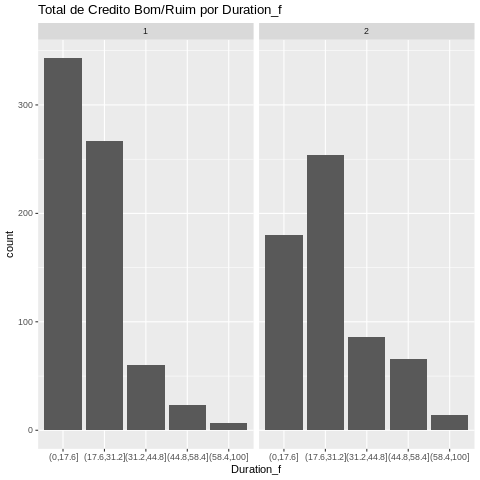

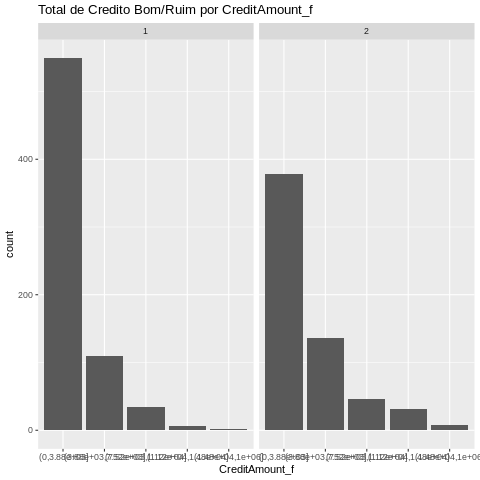

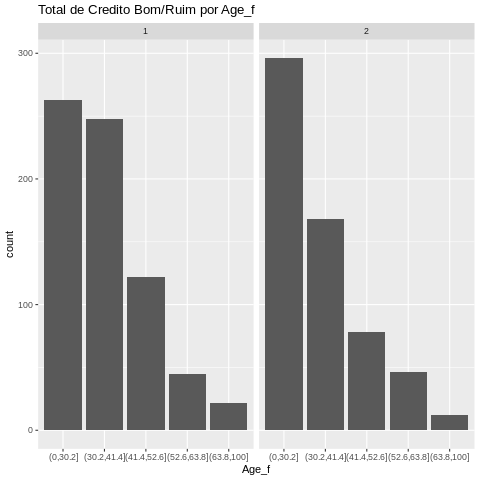

In [0]:
%%R
# Plots usando ggplot2
library(ggplot2)
lapply(colNames2, # função biblioteca que chama vetor com novas variáveis fatoradas
       function(x){
  if(is.factor(Credit[,x])) {
    ggplot(Credit, aes_string(x)) +
      geom_bar() + 
      facet_grid(. ~ CreditStatus) + # Mais de um gráfico na mesma área
      # todas as variáveis preditoras ~ variável target
      ggtitle(paste("Total de Credito Bom/Ruim por",x))}})


É possível notar que a primeira categoria dos mau pagadores (2) é muito mais presente na primeira faixa de idades do que os bons pagadores (1)

Profissionais A173 com habilidades técnicas, são melhores pagadores

---

### facet_grid() alternativo

Em uma única área de plotagem, 3 informações diferentes. 

Entre os bons pagadores considerando a variável CheckingAcctStatus, o grupo 2 de idade, apresenta maior quantidade de bons pagadores

[[1]]
NULL

[[2]]
NULL

[[3]]

[[4]]

[[5]]
NULL

[[6]]

[[7]]

[[8]]
NULL

[[9]]

[[10]]

[[11]]
NULL

[[12]]

[[13]]
NULL

[[14]]

[[15]]

[[16]]
NULL

[[17]]

[[18]]
NULL

[[19]]

[[20]]

[[21]]

[[22]]

[[23]]



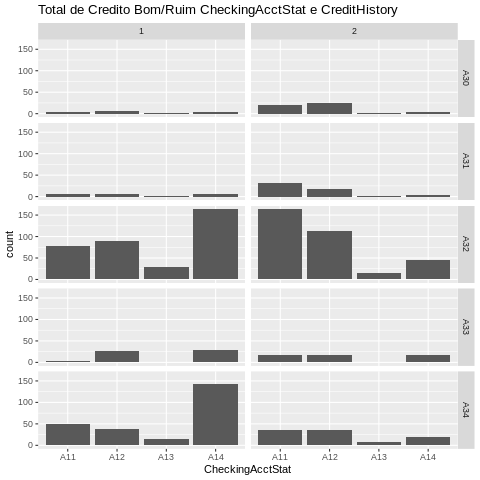

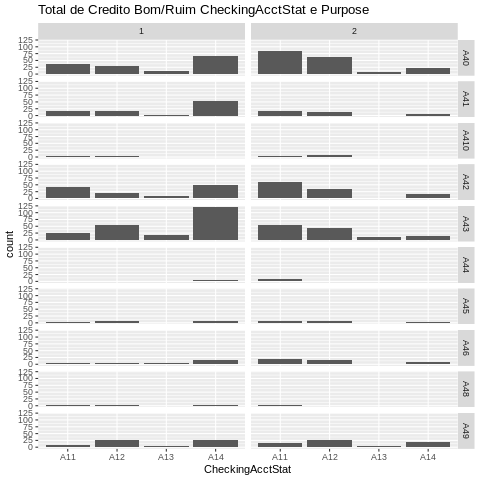

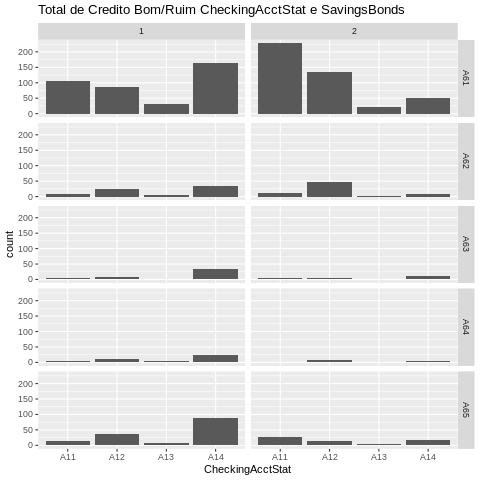

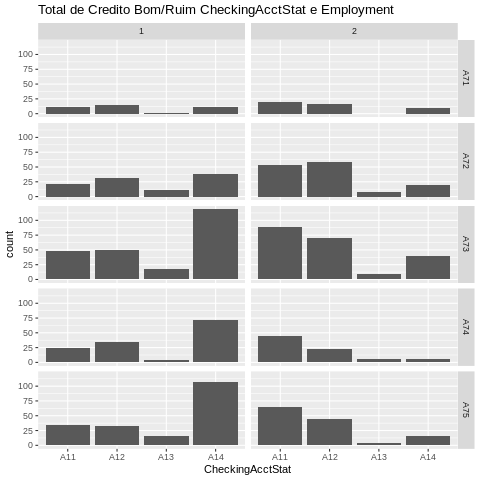

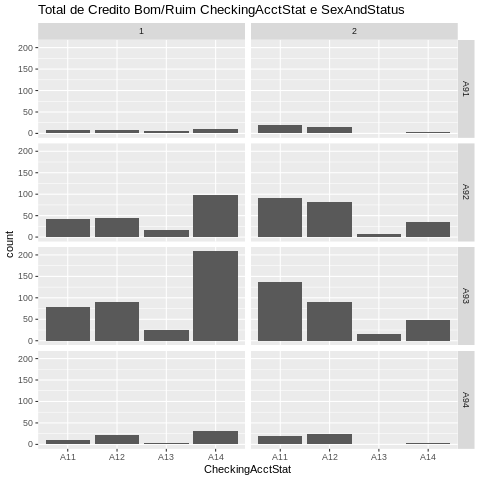

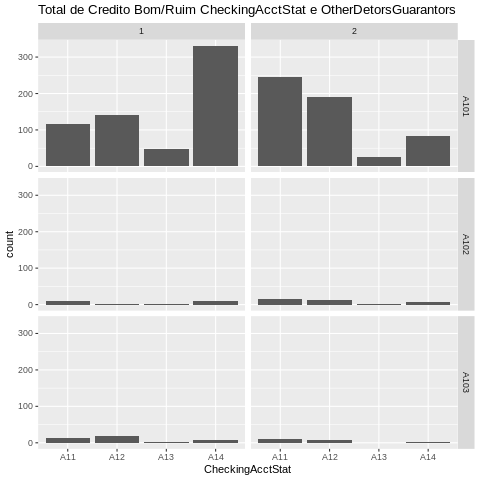

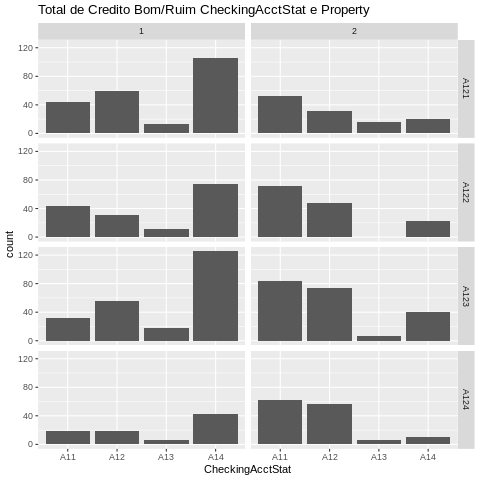

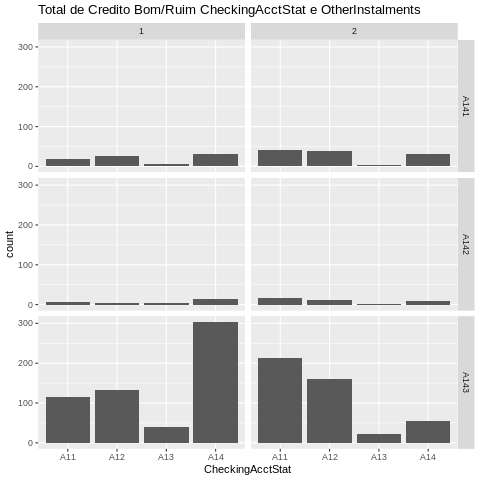

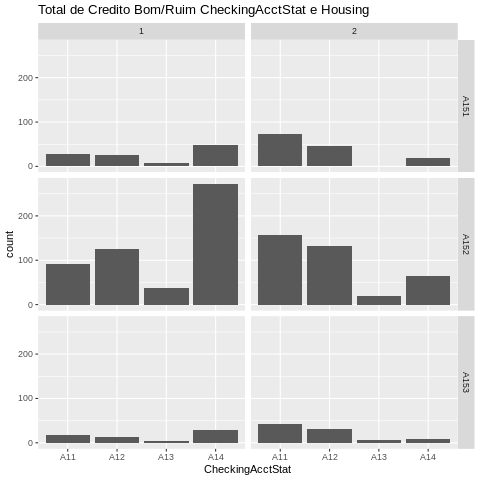

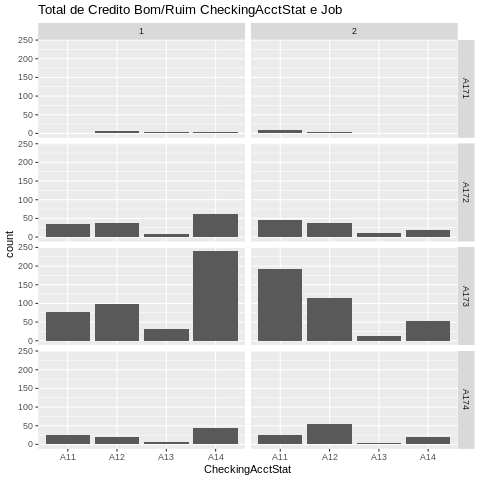

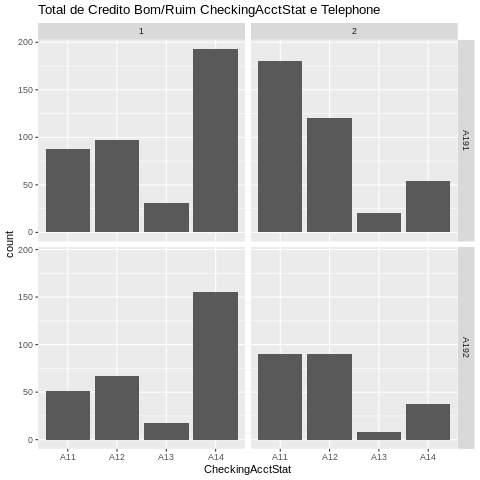

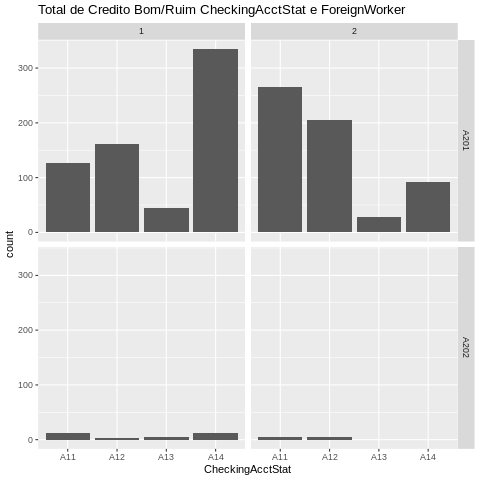

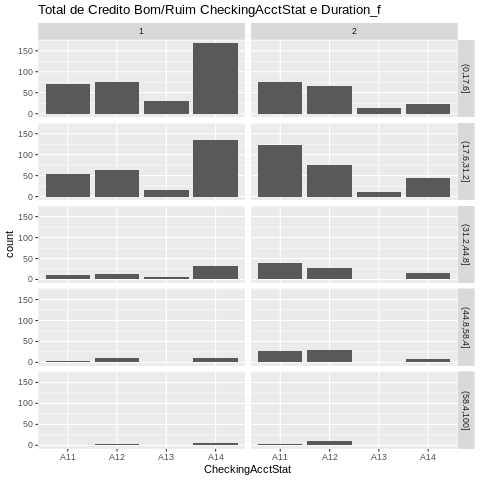

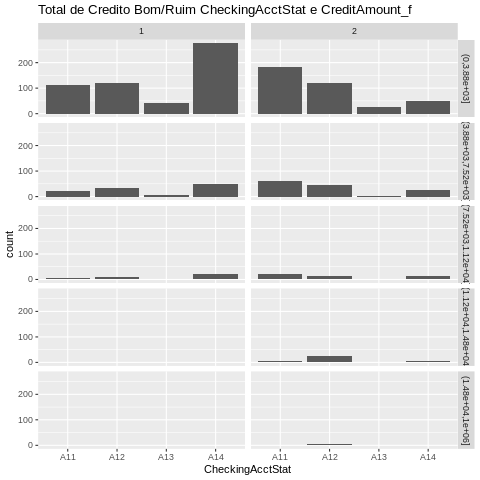

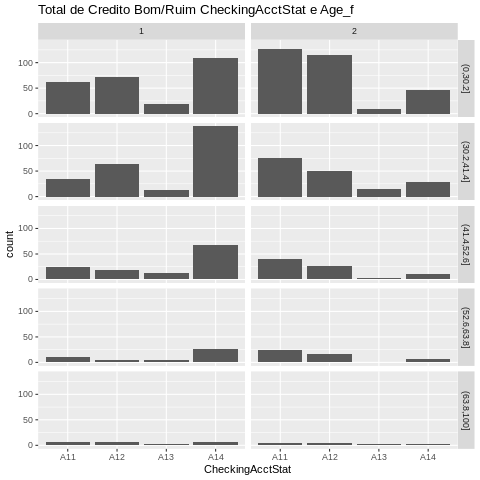

In [0]:
%%R
# Plots CreditStatus vs CheckingAcctStat
lapply(colNames2, function(x){
  if(is.factor(Credit[,x]) & x != "CheckingAcctStat") {
    ggplot(Credit, aes(CheckingAcctStat)) +
      geom_bar() + 
      facet_grid(paste(x, " ~ CreditStatus"))+ 
      # paste cola cada valor de x de maneira separada, com a variável CreditStatus
      ggtitle(paste("Total de Credito Bom/Ruim CheckingAcctStat e",x))
  }})

#**Feature Selection** - randomForest como forma de coletar as melhore preditoras

## Nível de Significância

In [0]:
%%R
# Variavel que controla a execucao do script
Azure <- FALSE

if(Azure){
  source("src/ClassTools.R")
  Credit <- maml.mapInputPort(1)
}  

In [0]:
%%R
install.packages("randomForest")
library(randomForest)

### Na Análise Exploratória detectmos que as variáveis abaixo são irrelevantes para a Criação do Modelo

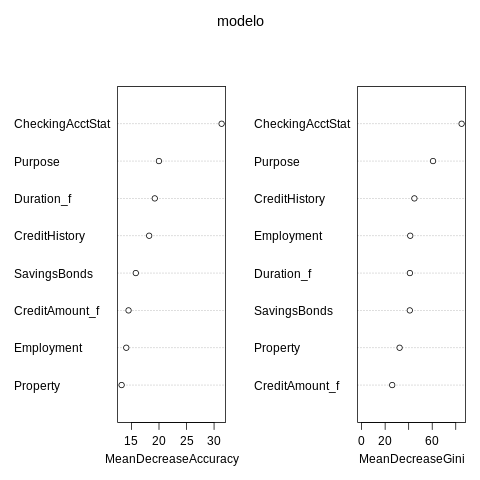

In [0]:
%%R
# Modelo randomForest para criar um plot de importância das variáveis
library(randomForest)
modelo <- randomForest( CreditStatus ~ .    #target relacionando com todas
                        - Duration          #exceto - 
                        - Age               #exceto - 
                        - CreditAmount      #exceto - 
                        - ForeignWorker     #exceto - 
                        - NumberDependents 
                        - Telephone
                        - ExistingCreditsAtBank
                        - PresentResidenceTime
                        - Job
                        - Housing
                        - SexAndStatus
                        - InstallmentRatePecnt
                        - OtherDetorsGuarantors
                        - Age_f
                        - OtherInstalments, 
                        data = Credit, 
                        ntree = 100, nodesize = 10, importance = T) #TRUE
# N

# importance habilita a importância das variáveis
# quais as variáveis mais importantes para o modelo 

varImpPlot(modelo)
# visualização das variáveis mais importantes.
# 1. CheckingAccStat

In [0]:
%%R
outFrame <- serList(list(credit.model = modelo))

In [0]:
%%R
## Output 
if(Azure) maml.mapOutputPort("outFrame")

---

#**Criar Modelo Preditivo no R**

In [0]:
%%R
# Criar um modelo de classificação baseado em randomForest
install.packages("randomForest")
library(randomForest)

In [0]:
%%R
# Cross Tabulation
# ?table
table(Credit$CreditStatus)


  1   2 
700 600 


## Split de Dados de Treino e Dados de Teste

In [0]:
%%R
# Função para gerar dados de treino e dados de teste
splitData <- function(dataframe, seed = NULL) {
  if (!is.null(seed)) set.seed(seed)
  index <- 1:nrow(dataframe)
  trainindex <- sample(index, trunc(length(index)/2))
  trainset <- dataframe[trainindex, ]
  testset <- dataframe[-trainindex, ]
  list(trainset = trainset, testset = testset)
}

In [0]:
%%R
# Gerando dados de treino e de teste
splits <- splitData(Credit, seed = 808)

In [0]:
%%R
# Separando os dados
dados_treino <- splits$trainset
dados_teste <- splits$testset

In [0]:
%%R
# Verificando o numero de linhas
nrow(dados_treino)
nrow(dados_teste)

[1] 650


In [0]:
%%R
# Construindo o modelo
modelo <- randomForest( CreditStatus ~ CheckingAcctStat
                       + Duration_f
                       + Purpose
                       + CreditHistory
                       + SavingsBonds
                       + Employment
                       + CreditAmount_f, 
                       data = dados_treino, 
                       ntree = 100, 
                       nodesize = 10)

In [0]:
%%R
# Imprimondo o resultado
print(modelo)


Call:
 randomForest(formula = CreditStatus ~ CheckingAcctStat + Duration_f +      Purpose + CreditHistory + SavingsBonds + Employment + CreditAmount_f,      data = dados_treino, ntree = 100, nodesize = 10) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 26.15%
Confusion matrix:
    1   2 class.error
1 282  74   0.2078652
2  96 198   0.3265306


---

# Score Model - Fazendo Previsões

In [0]:
%%R
# Previsões com um modelo de classificação baseado em randomForest
require(randomForest)

In [0]:
%%R
# Gerando previsões nos dados de teste
previsoes <- data.frame(observado = dados_teste$CreditStatus,
                        previsto = predict(modelo, newdata = dados_teste))


In [0]:
%%R
# Visualizando Resultado
head(previsoes)

   observado previsto
2          2        2
6          1        2
8          1        1
11         2        2
15         1        1
16         2        2


In [0]:
%%R
head(dados_teste)

   CheckingAcctStat Duration CreditHistory Purpose CreditAmount SavingsBonds
2               A12       48           A32     A43         5951          A61
6               A14       36           A32     A46         9055          A65
8               A12       36           A32     A41         6948          A61
11              A12       12           A32     A40         1295          A61
15              A11       15           A32     A40         1403          A61
16              A11       24           A32     A43         1282          A62
   Employment InstallmentRatePecnt SexAndStatus OtherDetorsGuarantors
2         A73                    2          A92                  A101
6         A73                    2          A93                  A101
8         A73                    2          A93                  A101
11        A72                    3          A92                  A101
15        A73                    2          A92                  A101
16        A73                    4       

---

#Avaliar Modelo

### Calculando a Matriz de Confusão em R

In [0]:
# Label 1 - Credito Ruim
# Label 2 - Credito Bom

## Fórmulas

In [0]:
%%R
Accuracy <- function(x){
  (x[1,1] + x[2,2]) / (x[1,1] + x[1,2] + x[2,1] + x[2,2])
}

Recall <- function(x){  
  x[1,1] / (x[1,1] + x[1,2])
}

Precision <- function(x){
  x[1,1] / (x[1,1] + x[2,1])
}

W_Accuracy  <- function(x){
  (x[1,1] + x[2,2]) / (x[1,1] + 5 * x[1,2] + x[2,1] + x[2,2])
}

F1 <- function(x){
  2 * x[1,1] / (2 * x[1,1] + x[1,2] + x[2,1])
}

## Criando a confusion matrix

In [0]:
%%R
# Criando a confusion matrix.
confMat <- matrix(unlist(Map(function(x, y
                                      ){sum(ifelse(previsoes[, 1] == x & previsoes[, 2] == y, 1, 0) )},
                                        c(2, 1, 2, 1), c(2, 2, 1, 1))), nrow = 2)

## Criando Dataframe com as estatísticas dos testes

In [0]:
%%R
# Criando um dataframe com as estatisticas dos testes
df_mat <- data.frame(Category = c("Credito Ruim", "Credito Bom"),
                     Classificado_como_ruim = c(confMat[1,1], confMat[2,1]),
                     Classificado_como_bom = c(confMat[1,2], confMat[2,2]),
                     Accuracy_Recall = c(Accuracy(confMat), Recall(confMat)),
                     Precision_WAcc = c(Precision(confMat), W_Accuracy(confMat)))

In [0]:
%%R
head(df_mat)

      Category Classificado_como_ruim Classificado_como_bom Accuracy_Recall
1 Credito Ruim                    216                    90       0.7769231
2  Credito Bom                     55                   289       0.7058824
  Precision_WAcc
1       0.797048
2       0.500000


In [0]:
%%R
# Gerando uma curva ROC em R
install.packages("ROCR")
library("ROCR")

In [0]:
%%R
# Gerando as classes de dados
class1 <- predict(modelo, newdata = dados_teste, type = 'prob')
class2 <- dados_teste$CreditStatus

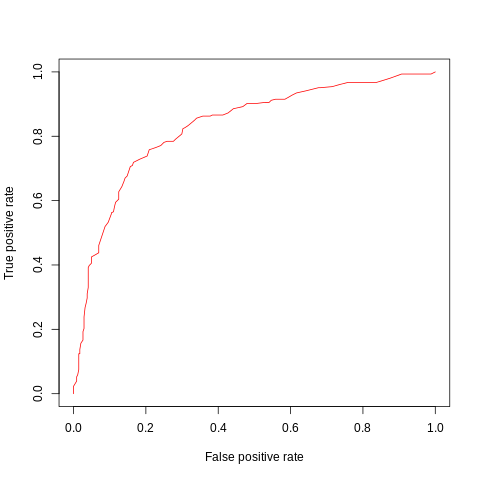

In [0]:
%%R
# Gerando a curva ROC
# ?prediction
# ?performance
pred <- prediction(class1[,2], class2)
perf <- performance(pred, "tpr","fpr") 

plot(perf, col = rainbow(10))

## Gerando Confusion Matrix com o Caret

In [0]:
%%R
install.packages("caret")
library(caret)

In [0]:
%%R
install.packages("e1071")
library(e1071)

In [0]:
%%R
#?confusionMatrix 
confusionMatrix(previsoes$observado, previsoes$previsto)

Confusion Matrix and Statistics

          Reference
Prediction   1   2
         1 289  55
         2  90 216
                                          
               Accuracy : 0.7769          
                 95% CI : (0.7429, 0.8084)
    No Information Rate : 0.5831          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.5495          
                                          
 Mcnemar's Test P-Value : 0.00475         
                                          
            Sensitivity : 0.7625          
            Specificity : 0.7970          
         Pos Pred Value : 0.8401          
         Neg Pred Value : 0.7059          
             Prevalence : 0.5831          
         Detection Rate : 0.4446          
   Detection Prevalence : 0.5292          
      Balanced Accuracy : 0.7798          
                                          
       'Positive' Class : 1               
                              

---

#**Otimizar Modelo**

## Modelo randomForest ponderado

## O pacote C50 permite dar peso aos erros, construindo assim um resultado ponderado




In [0]:
%%R
install.packages("C50")
library(C50)

In [0]:
%%R
# Criando uma Cost Function
Cost_func <- matrix(c(0, 1.5, 1, 0), nrow = 2, dimnames = list(c("1", "2"), c("1", "2")))

##**Criar Modelo**

In [0]:
# Criando o Modelo
# ?randomForest
# ?C5.0

In [0]:
%%R
# Cria o modelo
modelo_v2  <- C5.0(CreditStatus ~ CheckingAcctStat
                   + Purpose
                   + CreditHistory
                   + SavingsBonds
                   + Employment,
                   data = dados_treino,  
                   trials = 100,
                   cost = Cost_func)

print(modelo_v2)


Call:
C5.0.formula(formula = CreditStatus ~ CheckingAcctStat + Purpose
 + CreditHistory + SavingsBonds + Employment, data = dados_treino, trials
 = 100, cost = Cost_func)

Classification Tree
Number of samples: 650 
Number of predictors: 5 

Number of boosting iterations: 100 requested;  3 used due to early stopping
Average tree size: 15 

Non-standard options: attempt to group attributes

Cost Matrix:
    1 2
1 0.0 1
2 1.5 0


In [0]:
%%R
# Dataframes com valores observados e previstos
previsoes_v2 <- data.frame(observado = dados_teste$CreditStatus,
                           previsto = predict(object = modelo_v2, newdata = dados_teste))

In [0]:
%%R

# Calculando a Confusion Matrix em R (existem outras formas). 

# Label 1 - Credito Ruim
# Label 2 - Credito Bom

# Formulas
Accuracy <- function(x){
  (x[1,1] + x[2,2]) / (x[1,1] + x[1,2] + x[2,1] + x[2,2])
}

Recall <- function(x){  
  x[1,1] / (x[1,1] + x[1,2])
}

Precision <- function(x){
  x[1,1] / (x[1,1] + x[2,1])
}

W_Accuracy  <- function(x){
  (x[1,1] + x[2,2]) / (x[1,1] + 5 * x[1,2] + x[2,1] + x[2,2])
}

F1 <- function(x){
  2 * x[1,1] / (2 * x[1,1] + x[1,2] + x[2,1])
}


##**Criando Matriz de Confusão**

In [0]:
%%R
# Criando a confusion matrix.
confMat_v2 <- matrix(unlist(Map(function(x, y){sum(ifelse(previsoes_v2[, 1] == x & previsoes_v2[, 2] == y, 1, 0) )},
                             c(2, 1, 2, 1), c(2, 2, 1, 1))), nrow = 2)


In [0]:
%%R
# Criando um dataframe com as estatisticas dos testes
df_mat <- data.frame(Category = c("Credito Ruim", "Credito Bom"),
                     Classificado_como_ruim = c(confMat_v2[1,1], confMat_v2[2,1]),
                     Classificado_como_bom = c(confMat_v2[1,2], confMat_v2[2,2]),
                     Accuracy_Recall = c(Accuracy(confMat_v2), Recall(confMat_v2)),
                     Precision_WAcc = c(Precision(confMat_v2), W_Accuracy(confMat_v2)))
print(df_mat)

      Category Classificado_como_ruim Classificado_como_bom Accuracy_Recall
1 Credito Ruim                    176                   130       0.6861538
2  Credito Bom                     74                   270       0.5751634
  Precision_WAcc
1      0.7040000
2      0.3811966


##**Gerando Confusion Matrix com o Caret**

In [0]:
%%R
install.packages("caret")
library(caret)

In [0]:
%%R
confusionMatrix(previsoes_v2$observado, previsoes_v2$previsto)

Confusion Matrix and Statistics

          Reference
Prediction   1   2
         1 270  74
         2 130 176
                                          
               Accuracy : 0.6862          
                 95% CI : (0.6489, 0.7217)
    No Information Rate : 0.6154          
    P-Value [Acc > NIR] : 0.0001018       
                                          
                  Kappa : 0.3637          
                                          
 Mcnemar's Test P-Value : 0.0001177       
                                          
            Sensitivity : 0.6750          
            Specificity : 0.7040          
         Pos Pred Value : 0.7849          
         Neg Pred Value : 0.5752          
             Prevalence : 0.6154          
         Detection Rate : 0.4154          
   Detection Prevalence : 0.5292          
      Balanced Accuracy : 0.6895          
                                          
       'Positive' Class : 1               
                              

---

##**Avaliar Modelo Gráfico**

In [0]:
%%R
Azure <- FALSE

# Alterando atribuição da variável compFrame
if(Azure){
  source("src/ClassTools.R")
  compFrame <- maml.mapInputPort(1)
} else {
  compFrame <- result_previsto_v2 #outFrame
}

R[write to console]: Error in withVisible({ : object 'result_previsto_v2' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in withVisible({ : object 'result_previsto_v2' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible


In [0]:
%%R
# Usando o dplyr para filter linhas com classificação incorreta
require(dplyr)
creditTest <- cbind(dados_teste, scored = compFrame[ ,2] )
creditTest <- creditTest %>% filter(CreditStatus != scored)

R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following object is masked from ‘package:randomForest’:

    combine


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Error in cbind(dados_teste, scored = compFrame[, 2]) : 
  object 'compFrame' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible -> cbind




Error in cbind(dados_teste, scored = compFrame[, 2]) : 
  object 'compFrame' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible -> cbind


In [0]:
%%R
# Plot dos residuos para os niveis de cada fator
require(ggplot2)
colNames <- c("CheckingAcctStat", "Duration_f", "Purpose",
              "CreditHistory", "SavingsBonds", "Employment",
              "CreditAmount_f", "Employment")

In [0]:
%%R
lapply(colNames, function(x){
  if(is.factor(creditTest[,x])) {
    ggplot(creditTest, aes_string(x)) +
      geom_bar() + 
      facet_grid(. ~ CreditStatus) + 
      ggtitle(paste("Numero de creditos ruim/bom por",x))}})

R[write to console]: Error in is.factor(creditTest[, x]) : object 'creditTest' not found
Calls: <Anonymous> ... <Anonymous> -> withVisible -> lapply -> FUN -> is.factor




Error in is.factor(creditTest[, x]) : object 'creditTest' not found
Calls: <Anonymous> ... <Anonymous> -> withVisible -> lapply -> FUN -> is.factor


## Plot dos Resíduos condicionados nas variáveis CreditStatus vs CheckingAcctStat

In [0]:
%%R
# Plot dos residuos condicionados nas variváveis CreditStatus vs CheckingAcctStat
lapply(colNames, function(x){
  if(is.factor(creditTest[,x]) & x != "CheckingAcctStat") {
    ggplot(creditTest, aes(CheckingAcctStat)) +
      geom_bar() + 
      facet_grid(paste(x, " ~ CreditStatus"))+ 
      ggtitle(paste("Numero de creditos bom/ruim por CheckingAcctStat e ",x))
  }})